<a href="https://colab.research.google.com/github/9105507/MINERIA_DE_DATOS_23_24/blob/main/LAB02_Reglas_de_Asociacio%CC%81n_y_Patrones_Secuenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2 - Grupo 7**
Miguel Ángel Rojo

Miguel Poyatos García-Lorenzana

Joaquín Vilaplana

Adrián García-Arroba

# Inicialización

Librerías usadas:

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Práctica 1 (reglas de Asociación)
Valor (5 puntos)

Usa la librería mlxtend que nos permita solucionar todos los problemas relacionados con las reglas de asociación. Para ello tendremos que usar el algoritmo Apriori y una serie de métodos para obtener la distinta información que este genera. Usa la librería con el Dataset Market_Basket_Optimisation.csv que se ha proporcionado.

1.- (1 puntos) Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

2.- (1 punto) ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos.

3.- (1 punto) ¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?

4.- (1 punto) Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.

5.- (1 punto) Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes del supermercado?

Para obtener los datos pedidos anteriormente, se hará uso de la librería de la siguiente manera (pasos a seguir):

* Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el soporte de los itemset. Por lo tanto, se tendrá que usar un método que dado un itemset devuelva su soporte.

* A partir de k=2.

  - Mostrar los itemset frecuentes candidatos y su soporte.

* Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.

* Mostrar todas las posibles reglas con la confianza de cada una de ellas.

* Listar todas las reglas que sean de alta confianza.

* Usar los siguientes métodos.
  - Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor.
  - Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

* Utiliza al menos dos representaciones gráficas para representar las reglas obtenidas e interpretar los datos.


In [ ]:
# Cargar los datos
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

# Preprocesamiento
transactions = data.values.tolist()
transactions_clean = [[item for item in transaction if item is not np.nan] for transaction in transactions]

# Codificación de las transacciones
te = TransactionEncoder()
te_ary = te.fit(transactions_clean).transform(transactions_clean)
df = pd.DataFrame(te_ary, columns=te.columns_)

Información de la instrucción para hacer el método apriori

In [ ]:
help(apriori)

Help on function apriori in module mlxtend.frequent_patterns.apriori:

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  Fa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La función `apriori` de la biblioteca `mlxtend` tiene los siguientes hiperparámetros:

- `df`: DataFrame o matriz codificada de manera eficiente que ofrece una representación condensada de los datos de entrada.

- `min_support`: Un valor flotante entre 0 y 1 para el soporte mínimo de los itemsets a crear. Por defecto es `0.5`. El soporte es una medida de cuán frecuentemente aparece un itemset en el conjunto de datos.

- `use_colnames`: Booleano para indicar si se deben usar los nombres de las columnas de los DataFrames en lugar de las columnas. Por defecto es `False`.

- `max_len`: Entero para indicar la longitud máxima de los itemsets generados. Si es `None` (por defecto), se generan todos los itemsets posibles.

- `verbose`: Entero para indicar el nivel de detalle que la función debe proporcionar mientras se ejecuta. Por defecto es `0`, lo que significa que no se proporciona ninguna salida.

In [ ]:
# Generar itemsets frecuentes
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

In [ ]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


Indformación de la instrucción para hacer reglas

In [ ]:
help(association_rules)

Help on function association_rules in module mlxtend.frequent_patterns.association_rules:

association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)
    Generates a DataFrame of association rules including the
    metrics 'score', 'confidence', and 'lift'
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame of frequent itemsets
      with columns ['support', 'itemsets']
    
    metric : string (default: 'confidence')
      Metric to evaluate if a rule is of interest.
      **Automatically set to 'support' if `support_only=True`.**
      Otherwise, supported metrics are 'support', 'confidence', 'lift',
      'leverage', 'conviction' and 'zhangs_metric'
      These metrics are computed as follows:
    
      - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]
    
      - confidence(A->C) = support(A+C) / support(A), range: [0, 1]
    
      - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]
    
      - levera

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La función `association_rules` de la biblioteca `mlxtend` tiene los siguientes hiperparámetros:

- `df` (DataFrame): DataFrame de los itemsets frecuentes generados por la función `apriori`.

- `metric` (str): Métrica a utilizar para la selección de reglas. Las opciones disponibles son "support", "confidence", "lift", "leverage" y "conviction". Estas métricas son medidas de la "interesanteza" o "calidad" de las reglas de asociación.

- `min_threshold` (float): El valor mínimo para la métrica especificada. Solo las reglas que tienen una métrica mayor o igual a este umbral son seleccionadas.

- `support_only` (bool): Un parámetro opcional que, si se establece en True, la función `association_rules` solo calculará el soporte y devolverá las reglas de asociación sin calcular ninguna otra métrica².

In [ ]:
# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
1,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
2,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221


1. **Antecedent Support**:
   $$ \text{Antecedent Support} = \frac{\text{Número de transacciones con antecedente}}{\text{Número total de transacciones}} $$

2. **Consequent Support**:
   $$ \text{Consequent Support} = \frac{\text{Número de transacciones con consequent}}{\text{Número total de transacciones}} $$

3. **Support**:
   $$ \text{Support} = \frac{\text{Número de transacciones con antecedente y consequent}}{\text{Número total de transacciones}} $$

4. **Confidence**:
   $$ \text{Confidence} = \frac{\text{Support}(\text{Antecedent} \rightarrow \text{Consequent})}{\text{Support}(\text{Antecedent})} $$

5. **Lift**:
   $$ \text{Lift} = \frac{\text{Support}(\text{Antecedent} \rightarrow \text{Consequent})}{\text{Support}(\text{Antecedent}) \times \text{Support}(\text{Consequent})} $$

6. **Leverage**:
   $$ \text{Leverage} = \text{Support}(\text{Antecedent} \rightarrow \text{Consequent}) - \text{Support}(\text{Antecedent}) \times \text{Support}(\text{Consequent}) $$

7. **Conviction**:
   $$ \text{Conviction} = \frac{1 - \text{Support}(\text{Consequent})}{1 - \text{Confidence}(\text{Antecedent} \rightarrow \text{Consequent})}$$


## 1.- (1 puntos)

Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

In [ ]:
# Definir los valores de soporte y confianza a probar
configuraciones = [(0.01,0.3), (0.03,0.3), (0.01,0.5), (0.03,0.5)]

# Para cada combinación de soporte y confianza
for support, confidence  in configuraciones:
        # Generar itemsets frecuentes
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True)

        # Generar reglas de asociación
        rules = association_rules(frequent_itemsets, metric="confidence",
                                  min_threshold=confidence)

        # Imprimir las reglas generadas
        print("-------------------------------------------------------------------------------------------------")
        print(f"\n\n -> Reglas generadas con soporte={support} y confianza={confidence}:\n")
        print(rules[['antecedents','antecedents','confidence']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-------------------------------------------------------------------------------------------------


 -> Reglas generadas con soporte=0.01 y confianza=0.3:

                   antecedents                 antecedents  confidence
0                    (avocado)                   (avocado)    0.348000
1                    (burgers)                   (burgers)    0.330275
2                       (cake)                      (cake)    0.338816
3                    (cereals)                   (cereals)    0.398964
4                    (chicken)                   (chicken)    0.380000
..                         ...                         ...         ...
58           (spaghetti, milk)           (spaghetti, milk)    0.443609
59  (olive oil, mineral water)  (olive oil, mineral water)    0.371981
60      (olive oil, spaghetti)      (olive oil, spaghetti)    0.447674
61   (mineral water, pancakes)   (mineral water, pancakes)    0.339921
62       (pancakes, spaghetti)       (pancakes, spaghetti)    0

El **soporte** y la **confianza** son dos métricas clave en las reglas de asociación:

- **Soporte**: Representa la frecuencia relativa con la que aparecen los antecedentes y los consecuentes juntos. En otras palabras, es la proporción de transacciones en los datos que contienen un conjunto de elementos (itemset) específico.

- **Confianza**: Mide con qué frecuencia los artículos en Y aparecen en transacciones que también contienen X.

Ahora, analicemos cómo estos parámetros afectan los resultados de las reglas de asociación generadas:

1. **Reglas con soporte=0.01 y confianza=0.3**: Se generaron **63 reglas**. Esto indica que al tener un soporte y una confianza bajos, se pueden generar muchas reglas, pero estas pueden no ser muy fuertes (la confianza de estas reglas varía, pero no es muy alta).

2. **Reglas con soporte=0.03 y confianza=0.3**: Se generaron **6 reglas**. Al aumentar el soporte a 0.03, el número de reglas generadas disminuye. Esto se debe a que estamos buscando reglas que se cumplan en un mayor número de transacciones, siendo menos itemsets los que pueden servir para hacer reglas.

3. **Reglas con soporte=0.01 y confianza=0.5**: Se generaron **2 reglas**. Al aumentar la confianza a 0.5, el número de reglas generadas disminuye significativamente. Esto se debe a que estamos buscando reglas que se cumplan con una alta confianza, lo que es más difícil de encontrar.

4. **Reglas con soporte=0.03 y confianza=0.5**: No se generaron reglas. Esto indica que no hay reglas que se cumplan con una alta confianza (0.5) en un gran número de transacciones (soporte de 0.03).

En resumen, aumentar el soporte y la confianza hace que las reglas generadas sean más fuertes (es decir, se cumplen en más transacciones y con mayor confianza), pero también hace que sea más difícil encontrar dichas reglas. Por lo tanto, es importante elegir estos parámetros cuidadosamente para equilibrar la cantidad y la calidad de las reglas generadas.

## 2.- (1 punto)

¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos.

Soporte: Es la proporción de transacciones en las que aparece un conjunto de elementos. Se expresa como el número de transacciones que contienen el conjunto dividido por el número total de transacciones.

Frecuencia: Es simplemente el número de veces que aparece un conjunto de elementos en el conjunto de datos.

In [ ]:
# Calcular soporte
support = df.sum() / len(df)

# Calcular frecuencia
frequency = df.sum()

print(support)

print(frequency)

 asparagus           0.000133
almonds              0.020397
antioxydant juice    0.008932
asparagus            0.004666
avocado              0.033329
                       ...   
whole wheat pasta    0.029463
whole wheat rice     0.058526
yams                 0.011465
yogurt cake          0.027330
zucchini             0.009465
Length: 120, dtype: float64
 asparagus             1
almonds              153
antioxydant juice     67
asparagus             35
avocado              250
                    ... 
whole wheat pasta    221
whole wheat rice     439
yams                  86
yogurt cake          205
zucchini              71
Length: 120, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


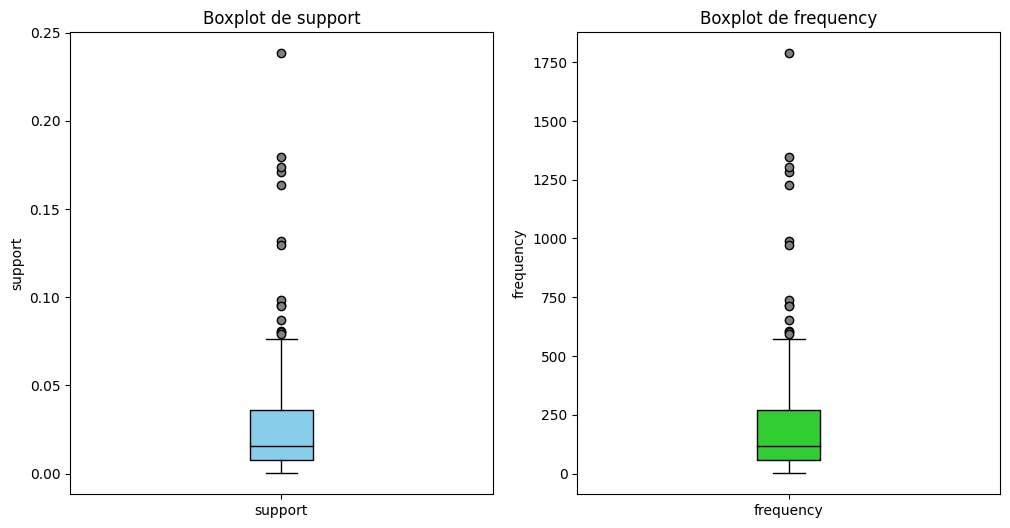

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura

# Grafica el boxplot para Soporte
plt.subplot(1, 2, 1)
plt.boxplot(support,
            labels=['support'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'skyblue', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos
plt.title('Boxplot de support')
plt.ylabel('support')

# Grafica el boxplot para Frecuencia
plt.subplot(1, 2, 2)
plt.boxplot(frequency,
            labels=['frequency'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'limegreen', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos

plt.title('Boxplot de frequency')
plt.ylabel('frequency')
plt.show()

# Muestra el gráfico combinado
plt.tight_layout()
plt.show()

## 3.- (1 punto)

¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?

In [ ]:
# Generar itemsets frecuentes
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
print(frequent_itemsets)

      support                           itemsets
0    0.020397                          (almonds)
1    0.033329                          (avocado)
2    0.033729                         (brownies)
3    0.087188                          (burgers)
4    0.030129                           (butter)
..        ...                                ...
98   0.020131  (mineral water, whole wheat rice)
99   0.022930             (olive oil, spaghetti)
100  0.025197              (pancakes, spaghetti)
101  0.021197                (shrimp, spaghetti)
102  0.020931              (tomatoes, spaghetti)

[103 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mostrar reglas con diferentes configuraciones
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.4)

# Imprimir reglas
print("\n ->Reglas con alta confianza:")
print(rules_confidence[['antecedents', 'consequents', 'confidence', 'lift']])

print("\n\n ->Reglas con alto lift:")
print(rules_lift[['antecedents', 'consequents', 'confidence', 'lift']])



 ->Reglas con alta confianza:
            antecedents      consequents  confidence      lift
0             (burgers)           (eggs)    0.330275  1.837830
1             (burgers)   (french fries)    0.252294  1.476173
2             (burgers)  (mineral water)    0.279817  1.173883
3             (burgers)      (spaghetti)    0.246177  1.413918
4                (cake)  (mineral water)    0.338816  1.421397
5             (chicken)  (mineral water)    0.380000  1.594172
6           (chocolate)           (eggs)    0.202604  1.127397
7           (chocolate)   (french fries)    0.209927  1.228284
8        (french fries)      (chocolate)    0.201248  1.228284
9   (frozen vegetables)      (chocolate)    0.240559  1.468215
10        (ground beef)      (chocolate)    0.234735  1.432669
11               (milk)      (chocolate)    0.247942  1.513276
12      (mineral water)      (chocolate)    0.220917  1.348332
13          (chocolate)  (mineral water)    0.321400  1.348332
14          (chocolate) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


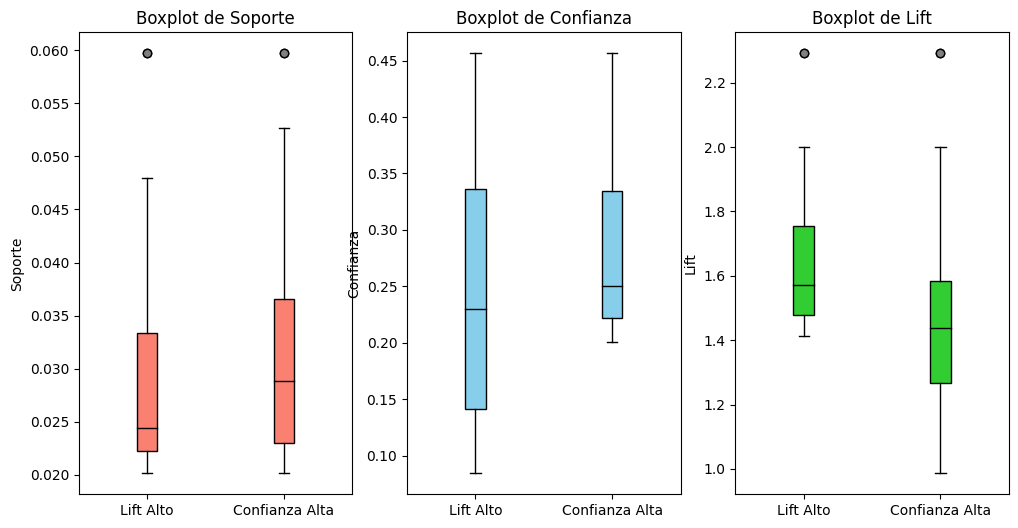

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura

# Grafica el boxplot para soporte
plt.subplot(1, 3, 1)
lift_alto = rules_lift['support']
confidence_alto = rules_confidence['support']
plt.boxplot([lift_alto, confidence_alto],
            labels=['Lift Alto', 'Confianza Alta'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'salmon', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos
plt.title('Boxplot de Soporte')
plt.ylabel('Soporte')

# Grafica el boxplot para confianza
plt.subplot(1, 3, 2)
lift_alto = rules_lift['confidence']
confidence_alto = rules_confidence['confidence']
plt.boxplot([lift_alto, confidence_alto],
            labels=['Lift Alto', 'Confianza Alta'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'skyblue', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos
plt.title('Boxplot de Confianza')
plt.ylabel('Confianza')

# Grafica el boxplot para lift
plt.subplot(1, 3, 3)
lift_alto = rules_lift['lift']
confidence_alto = rules_confidence['lift']
plt.boxplot([lift_alto, confidence_alto],
            labels=['Lift Alto', 'Confianza Alta'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'limegreen', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos

plt.title('Boxplot de Lift')
plt.ylabel('Lift')
plt.show()

# Muestra el gráfico combinado
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


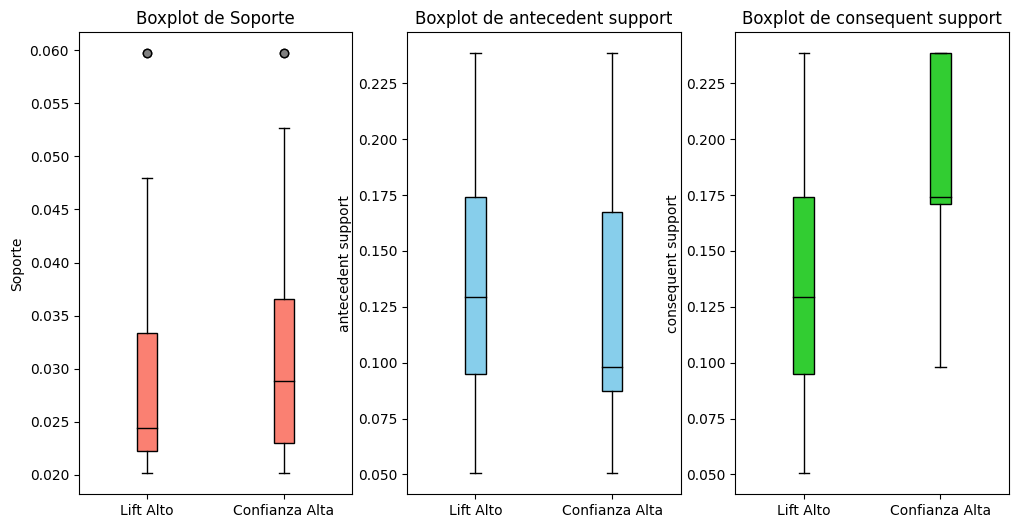

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura

# Grafica el boxplot para soporte
plt.subplot(1, 3, 1)
lift_alto = rules_lift['support']
confidence_alto = rules_confidence['support']
plt.boxplot([lift_alto, confidence_alto],
            labels=['Lift Alto', 'Confianza Alta'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'salmon', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos
plt.title('Boxplot de Soporte')
plt.ylabel('Soporte')

# Grafica el boxplot para confianza
plt.subplot(1, 3, 2)
lift_alto = rules_lift['antecedent support']
confidence_alto = rules_confidence['antecedent support']
plt.boxplot([lift_alto, confidence_alto],
            labels=['Lift Alto', 'Confianza Alta'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'skyblue', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos
plt.title('Boxplot de antecedent support')
plt.ylabel('antecedent support')

# Grafica el boxplot para lift
plt.subplot(1, 3, 3)
lift_alto = rules_lift['consequent support']
confidence_alto = rules_confidence['consequent support']
plt.boxplot([lift_alto, confidence_alto],
            labels=['Lift Alto', 'Confianza Alta'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'limegreen', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos

plt.title('Boxplot de consequent support')
plt.ylabel('consequent support')
plt.show()

# Muestra el gráfico combinado
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


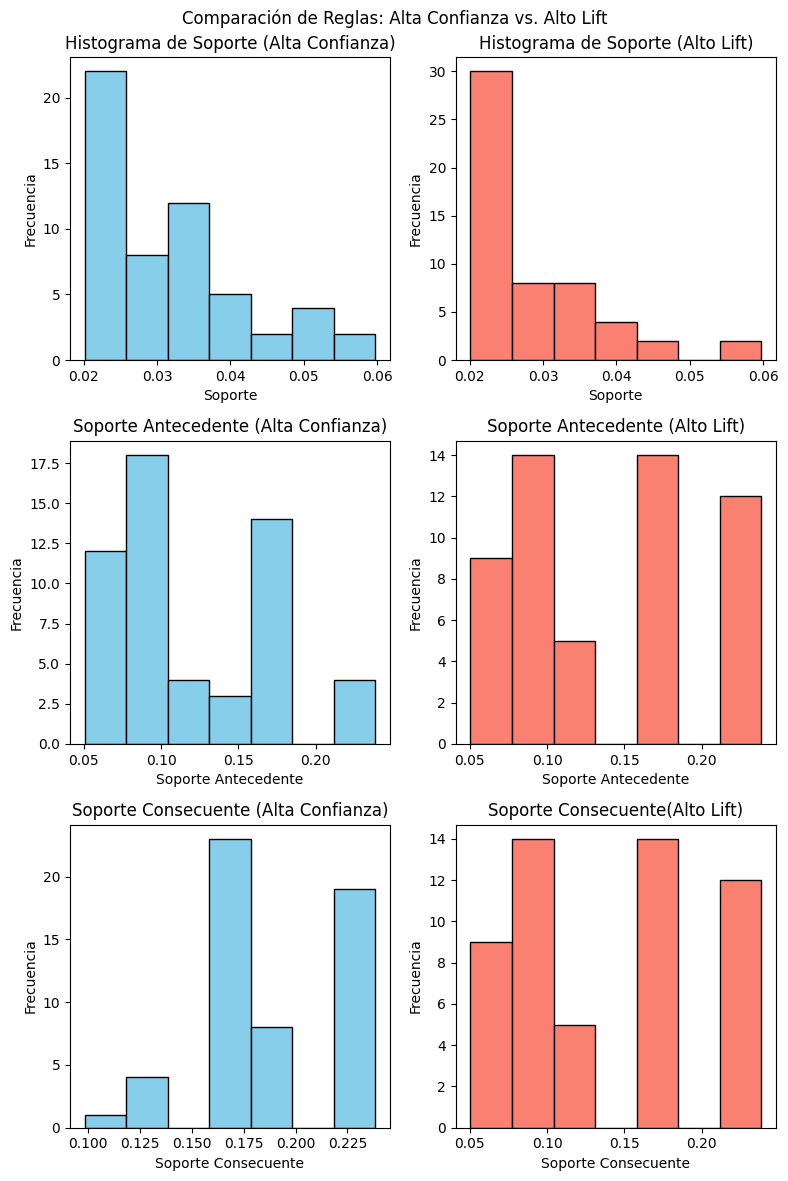

In [ ]:
# Crear un subplot con dos histogramas
fig, axs = plt.subplots(3, 2, figsize=(8, 12))

# Histograma para las reglas con alta confianza
axs[0,0].hist(rules_confidence['support'], bins='auto', color='skyblue', edgecolor='black')
axs[0,0].set_title('Histograma de Soporte (Alta Confianza)')
axs[0,0].set_xlabel('Soporte')
axs[0,0].set_ylabel('Frecuencia')

axs[1,0].hist(rules_confidence['antecedent support'], bins='auto', color='skyblue', edgecolor='black')
axs[1,0].set_title('Soporte Antecedente (Alta Confianza)')
axs[1,0].set_xlabel('Soporte Antecedente')
axs[1,0].set_ylabel('Frecuencia')

axs[2,0].hist(rules_confidence['consequent support'], bins='auto', color='skyblue', edgecolor='black')
axs[2,0].set_title('Soporte Consecuente (Alta Confianza)')
axs[2,0].set_xlabel('Soporte Consecuente')
axs[2,0].set_ylabel('Frecuencia')

# Histograma para las reglas con alto lift
axs[0,1].hist(rules_lift['support'], bins='auto', color='salmon', edgecolor='black')
axs[0,1].set_title('Histograma de Soporte (Alto Lift)')
axs[0,1].set_xlabel('Soporte')
axs[0,1].set_ylabel('Frecuencia')

axs[1,1].hist(rules_lift['antecedent support'], bins='auto', color='salmon', edgecolor='black')
axs[1,1].set_title('Soporte Antecedente (Alto Lift)')
axs[1,1].set_xlabel('Soporte Antecedente')
axs[1,1].set_ylabel('Frecuencia')

axs[2,1].hist(rules_lift['consequent support'], bins='auto', color='salmon', edgecolor='black')
axs[2,1].set_title('Soporte Consecuente(Alto Lift)')
axs[2,1].set_xlabel('Soporte Consecuente')
axs[2,1].set_ylabel('Frecuencia')

# Agregar un título común para todo el subplot
fig.suptitle('Comparación de Reglas: Alta Confianza vs. Alto Lift')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


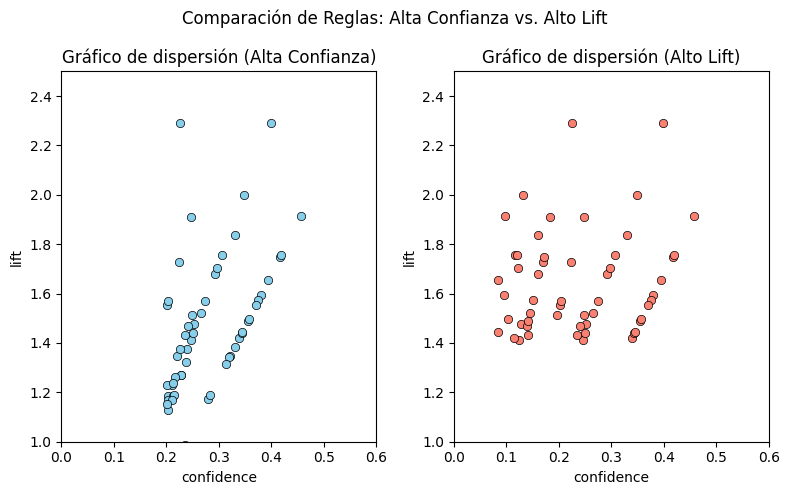

In [ ]:
# Crear un subplot con dos histogramas
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Histograma para las reglas con alta confianza
axs[0].scatter(rules_confidence['confidence'], rules_confidence['lift'],
               alpha=1, color='skyblue', edgecolor='black', linewidth=0.5)
axs[0].set_title('Gráfico de dispersión (Alta Confianza)')
axs[0].set_xlabel('confidence')
axs[0].set_ylabel('lift')
axs[0].set_xlim(0,0.6)
axs[0].set_ylim(1,2.5)

# Histograma para las reglas con alto lift
axs[1].scatter(rules_lift['confidence'], rules_lift['lift'],
               alpha=1, color='salmon', edgecolor='black', linewidth=0.5)
axs[1].set_title('Gráfico de dispersión (Alto Lift)')
axs[1].set_xlabel('confidence')
axs[1].set_ylabel('lift')
axs[1].set_xlim(0,0.6)
axs[1].set_ylim(1,2.5)

# Agregar un título común para todo el subplot
fig.suptitle('Comparación de Reglas: Alta Confianza vs. Alto Lift')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


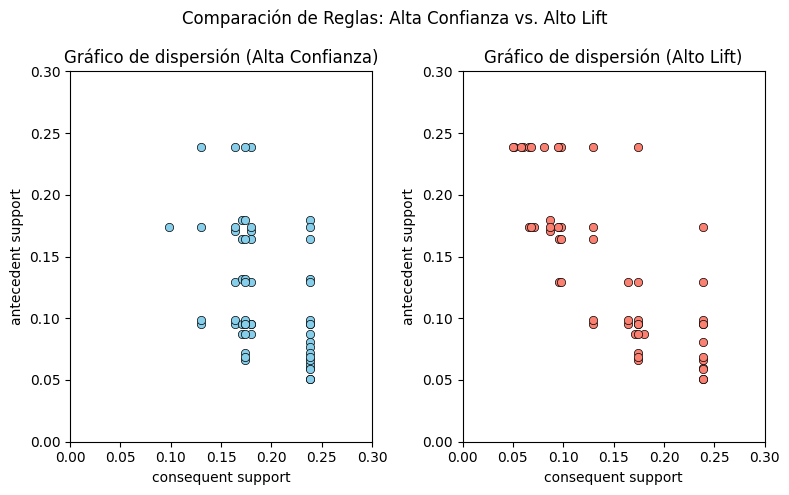

In [ ]:
# Crear un subplot con dos histogramas
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Histograma para las reglas con alta confianza
axs[0].scatter(rules_confidence['consequent support'], rules_confidence['antecedent support'],
               alpha=1, color='skyblue', edgecolor='black', linewidth=0.5)
axs[0].set_title('Gráfico de dispersión (Alta Confianza)')
axs[0].set_xlabel('consequent support')
axs[0].set_ylabel('antecedent support')
axs[0].set_xlim(0,0.3)
axs[0].set_ylim(0,0.3)

# Histograma para las reglas con alto lift
axs[1].scatter(rules_lift['consequent support'], rules_lift['antecedent support'],
               alpha=1, color='salmon', edgecolor='black', linewidth=0.5)
axs[1].set_title('Gráfico de dispersión (Alto Lift)')
axs[1].set_xlabel('consequent support')
axs[1].set_ylabel('antecedent support')
axs[1].set_xlim(0,0.3)
axs[1].set_ylim(0,0.3)

# Agregar un título común para todo el subplot
fig.suptitle('Comparación de Reglas: Alta Confianza vs. Alto Lift')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## 4.- (1 punto)

Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.

## 5.- (1 punto)

Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes del supermercado?

# Práctica 2 (Patrones Secuenciales)
Valor (5 puntos)

El conjunto de datos “Online Retail.xlsx” contiene productos (definidos por la columna StockCode y Description) comprados por diferentes clientes (definidos por la columna CustomerID) en diferentes momentos (definidos por el campo InvoiceDate).

1.- (2 puntos) Habrá que procesar el fichero para crear una lista de los distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes.

Una vez hecho esto y analizando esta información se pueden extraer conclusiones sobre en que orden compran los clientes los productos y así tomar decisiones de negocio. Este estudio se puede llevar a cabo aplicando el algoritmo Generalized Sequential Patterns utilizando la implementación de éste disponible en la librería gsppy.

2.- (1 punto) Prueba al menos dos configuraciones de soporte diferentes.

3.- (1 puntos) Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos.

3.- (1 punto) Saca conclusiones de negocio en virtud de algunas de las reglas elegidas por vosotros que mayor confianza tengan.

Librería gsppy:
Podéis encontrar su documentación en el siguiente enlace: https://pypi.org/project/gsppy/

## 1.- (2 puntos)

Habrá que procesar el fichero para crear una lista de los distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes.

Cargamos la base de datos con la que vamos a trabajar. Por comodidad, se ha decidido subirla a Google Drive y cargarla desde ahí:

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
directorio_drive = '/content/drive/MyDrive/Ingeniería Matemática/Online Retail.xlsx'

# Carga el archivo Excel en un DataFrame.
data = pd.read_excel(directorio_drive)

Mounted at /content/drive


Se crea una copia del dataset para no perder los datos originales:

In [ ]:
df = data.copy()

Representamos los datos para ver su formato.

In [ ]:
# Visualización de los datos.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


La base de datos representan características de pedidos de clientes en la que se incluyen el tipo de pedido, la cantidad del mismo, el precio por unidad y de qué país es el cliente.

In [ ]:
# Dimensiones de la base de datos.
df.shape

(541909, 8)

En la base de datos hay más de medio millón de registros, 541909, en cada uno de ellos se guardan 8 características.

In [ ]:
# Características de cada pedido.
print(df.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


* InvoiceNo: Número de factura de la transacción realizada. Variable importante debido a que nos sirve como un identificador del tiempo.

* StockCode: Identificador del producto.

* Description: descripción del producto.

* Quantity: cantidad de productos "StockCode" que el cliente ha comprado.

* InvoiceDate: Fecha en la que se ha realizado la transacción. También es un indicador del tiempo, pero es mejor 'InvoiceNo'.

* UnitPrice: Valor de una unidad del producto identificado por "StockCode".

* CustomerID: Identificador del cliente. Variable importante debido a que nos va a permitir agrupar todas las transacciones por cliente.

* Country: País donde se envían los productos comprados en la transacción.

In [ ]:
paises = df.loc[:,'Country'].unique().tolist()

# Paises en la base de datos
print(paises)
# Cantidad de paises
print("Nº de países:",len(paises))

['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria', 'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community', 'Malta', 'RSA']
Nº de países: 38


Hay registros de pedidos en 38 países distintos.

Se procede a analizar el tipo de variable que guarda cada columna y si exite algún Nan en alguna de ellas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.1+ MB


Se puede ver que sólo en la variable Description existen Nan, veamos si con el StockCode podemos determinar qué productos son haciendo uso de información de otros datos que puedan tener el mismo StockCode.

Así, se va a intentar rellenar las descripciones que tienen Nan utilizando otros registros con el mismo 'StockCode' que sí tengan descripción.

Antes de realizar esta tarea de recuperación de información, se ha considerado que hay valores de 'UnitPrice' y 'Quantity' erróneos, estos son aquellos que sean menores o iguales que cero. Antes de tomar decisiones, veamos datos estadísticos de estas variables y visualizemos sus distribuciones con boxplots:

In [ ]:
print(df.describe().loc[['mean', 'std', 'min','50%', 'max']])

          Quantity     UnitPrice    CustomerID
mean      9.552250      4.611114  15287.518434
std     218.081158     96.759853   1484.746041
min  -80995.000000 -11062.060000  12346.000000
50%       3.000000      2.080000  15287.000000
max   80995.000000  38970.000000  18287.000000


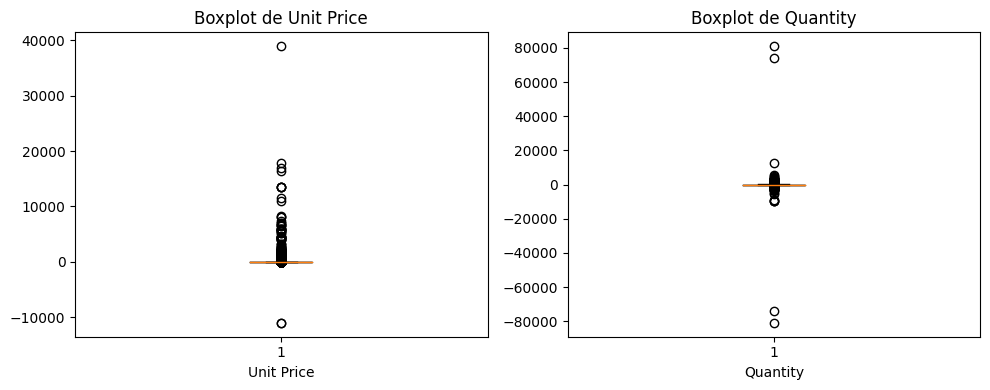

In [ ]:
# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Crear boxplot para UnitPrice
axes[0].boxplot(df['UnitPrice'])
axes[0].set_title('Boxplot de Unit Price')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('')

# Crear boxplot para Quantity
axes[1].boxplot(df['Quantity'])
axes[1].set_title('Boxplot de Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Como se puede observar, hay una gran cantidad de outliers en ambas variables. En principio, lo que más sentido tiene es solo eliminar aquellos valores que sean <= que 0. Y aunque podría tener sentido que alguien compre una gran cantidad de productos (como 80000) o que un producto tenga un valor muy alto (como 40000), se entiende que al ser matemáticamente outliers, están muy alejados de la distribución real de cada variable y por lo tanto, se decide eliminar también a los outliers de las zonas superiores. Aun así, veamos qué porción del dataset forman los outliers:

In [ ]:
# Función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)].copy()  # Utilizar copy()
    outliers['Outlier_Variable'] = variable  # Agregar el nuevo campo
    return outliers

variables_interes = ['UnitPrice', 'Quantity']
for variable in variables_interes:
    outliers = detectar_outliers(df, variable)
    print(f"Outliers en {variable}:")
    print("Tamaño: ", outliers[variable].shape)
    print("Datos estadísticos: \n", outliers[variable].describe())
    print()

Outliers en UnitPrice:
Tamaño:  (39627,)
Datos estadísticos: 
 count    39627.000000
mean        31.084752
std        356.699161
min     -11062.060000
25%          9.950000
50%         11.630000
75%         15.790000
max      38970.000000
Name: UnitPrice, dtype: float64

Outliers en Quantity:
Tamaño:  (58619,)
Datos estadísticos: 
 count    58619.000000
mean        50.590969
std        661.524902
min     -80995.000000
25%         24.000000
50%         25.000000
75%         48.000000
max      80995.000000
Name: Quantity, dtype: float64



Los outliers son una gran cantidad de datos (~ 40000 y 60000 registros), son una muestra significativa de los datos, pero debido a cuestiones de tiempo de computación que tendrán lugar más adelante, se decide eliminar todos los outliers (forzando la eliminación de valores <= que 0).

In [ ]:
def eliminar_outliers(data, variables):
  # Crear una copia del DataFrame para evitar modificar el original
  data_no_outliers = data.copy()
  lower_bound = []
  upper_bound = []
  for variable in variables:
    Q1 = data_no_outliers[variable].quantile(0.25)
    Q3 = data_no_outliers[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound.append(Q1 - 1.5 * IQR)
    upper_bound.append(Q3 + 1.5 * IQR)

  for i in range(len(variables)):
    # Filtrar los outliers y mantener solo los valores dentro del rango
    data_no_outliers = data_no_outliers[(data_no_outliers[variables[i]] >= lower_bound[i]) & (data_no_outliers[variables[i]] <= upper_bound[i])]
    data_no_outliers = data_no_outliers[(data_no_outliers[variables[i]] > 0)]

  return data_no_outliers

variables_interes = ['UnitPrice', 'Quantity']
df = eliminar_outliers(df, variables_interes)

# Ahora, df_no_outliers contiene el DataFrame sin outliers en las variables de interés


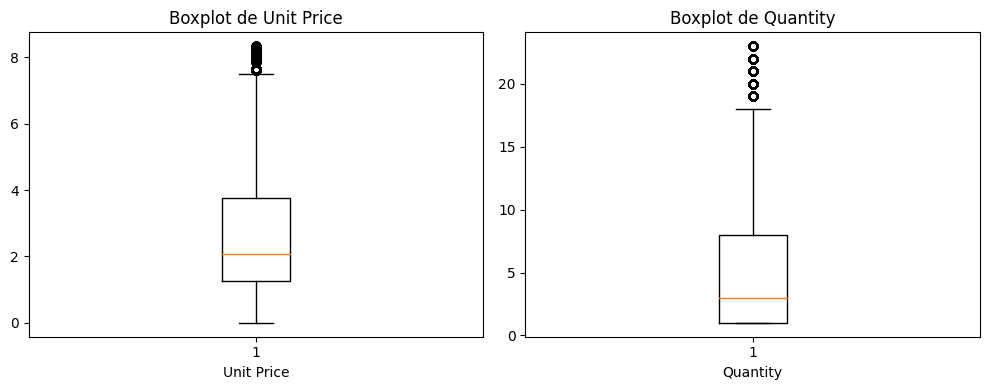

In [ ]:
# Verificar los cambios
# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Crear boxplot para UnitPrice
axes[0].boxplot(df['UnitPrice'])
axes[0].set_title('Boxplot de Unit Price')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('')

# Crear boxplot para Quantity
axes[1].boxplot(df['Quantity'])
axes[1].set_title('Boxplot de Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# variables_interes = ['UnitPrice', 'Quantity']
# for variable in variables_interes:
#     outliers = detectar_outliers(df, variable)
#     print(f"\nOUTLIERS EN '{variable}':")
#     print("Tamaño:",outliers[variable].shape,"\n")
#     print("Datos estadísticos:")
#     print(outliers[variable].describe())

In [ ]:
print("Nuevo tamaño del dataset: ", df.shape)

Nuevo tamaño del dataset:  (436166, 8)


Ahora, se procede a lo mencionado anteriormente: intentar rellenar las descripciones que tienen Nan utilizando otros registros con el mismo 'StockCode' que sí tengan descripción. Veamos cuántos Nan nos quedan tras la depuración:

In [ ]:
print(df[pd.isna(df['Description'])].shape)

(0, 8)


No obstante, se observa que al realizar la depuración de las variables 'UnitPrice' y 'Quantity' se han borrado también todos los registros que tenían Nan en 'Description'.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436166 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    436166 non-null  object        
 1   StockCode    436166 non-null  object        
 2   Description  436166 non-null  object        
 3   Quantity     436166 non-null  int64         
 4   InvoiceDate  436166 non-null  datetime64[ns]
 5   UnitPrice    436166 non-null  float64       
 6   CustomerID   436166 non-null  int64         
 7   Country      436166 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 29.9+ MB


Antes de proceder a la construcción de la base de datos en el formato necesario, se hacen unas últimas comprobaciones de que nuestros datos no contienen ninguna anomalía:

In [ ]:
print(df.nunique())

InvoiceNo      17875
StockCode       3656
Description     3750
Quantity          23
InvoiceDate    16679
UnitPrice        278
CustomerID      4165
Country           38
dtype: int64


In [ ]:
print(df.duplicated().sum())#HAY FILAS DUPLICADAS

4944


In [ ]:
duplicated_rows = df[df.duplicated(keep=False)]
sorted_rows = duplicated_rows.sort_values(by=df.columns.tolist())
sorted_rows[['InvoiceNo', 'StockCode', 'Description', 'Quantity']].head()

,InvoiceNo,StockCode,Description,Quantity
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1


Se detectan filas duplicadas. Para evitar la redundancia y solo contar con registros únicos, se eliminan:

In [ ]:
df = df.drop_duplicates()

In [ ]:
print("Nuevo tamaño del dataset: ", df.shape)

Nuevo tamaño del dataset:  (431222, 8)
